In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score  
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_parquet(r"C:\Users\ISAIAS_QUINTERO\Desktop\Trabajo Practica\datos_modelo.parquet")
df.head()

,SEXO,EDAD,GRUPO,ESPECIALIDAD_MEDICA,SUBJETIVO,OBJETIVO,Concatenada,Label_Grupo,Concatenado1
0,Femenino,38,Otros Trastornos,PSICOLOGÍA,"Paciente refiere: ""Me empezaron a dar como uno...","Paciente alerta, colaboradora con apariencia o...","[empezar, episodio, tom, pastilla, dormir, ten...",0,empezar episodio tom pastilla dormir tener pro...
1,Masculino,22,T. Externalizantes,PSICOLOGÍA,"Paciente refiere ""Me he sentido muy mal, en el...","Paciente a quien evaluó por primera vez, alert...","[sentido, trabajar, concentrar yo, cosa, vidat...",2,sentido trabajar concentrar yo cosa vidatodo d...
2,Masculino,9,Otros Trastornos,PSICOLOGÍA,"La madre refiere ""el viene por un acompañamien...",None,"[madre, venir, acompañamiento, emocional, sepr...",0,madre venir acompañamiento emocional sepracion...
3,Masculino,28,Otros Trastornos,PSICOLOGÍA,"Paciente refiere ""Estas cosas que han pasado m...","Paciente quien evalúo por primera vez, alerta,...","[cosa, problema, empresa, ocasión, saludar, sa...",0,cosa problema empresa ocasión saludar saludo e...
4,Femenino,8,Otros Trastornos,PSICOLOGÍA,"La madre refiere ""Ella ha manifestado ciertas ...","Paciente ingresa en compañía de la madre, aler...","[madre, manifestado, conducta, palabrasella, r...",0,madre manifestado conducta palabrasella relaci...


In [3]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   SEXO                 3000 non-null   object
 1   EDAD                 3000 non-null   int64 
 2   GRUPO                3000 non-null   object
 3   ESPECIALIDAD_MEDICA  3000 non-null   object
 4   SUBJETIVO            2907 non-null   object
 5   OBJETIVO             2946 non-null   object
 6   Concatenada          3000 non-null   object
 7   Label_Grupo          3000 non-null   int32 
 8   Concatenado1         3000 non-null   object
dtypes: int32(1), int64(1), object(7)
memory usage: 199.3+ KB


In [4]:

# Dividir datos antes del vectorizador
X = df["Concatenado1"]
y = df["Label_Grupo"]

# Vectorización segura
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
vectorizer_LR = TfidfVectorizer()
X_train_vect = vectorizer_LR.fit_transform(X_train)
X_test_vect = vectorizer_LR.transform(X_test)



X_train.shape, X_test.shape, y_train.shape, y_test.shape


((2100,), (900,), (2100,), (900,))

In [5]:
LR = LogisticRegression()
LR.fit(X_train_vect, y_train)
y_pred = LR.predict(X_test_vect)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6444444444444445
Precision: 0.6638077945068552
Recall: 0.6444444444444445
F1 Score: 0.6363154659317949
Confusion Matrix:
 [[130  13   3  13   4  32]
 [ 15 172   0   2   6  44]
 [ 23   7  32  13   3  21]
 [ 14  11   0  55   1  12]
 [  8   5   0   2  13  14]
 [ 15  25   1   7   6 178]]


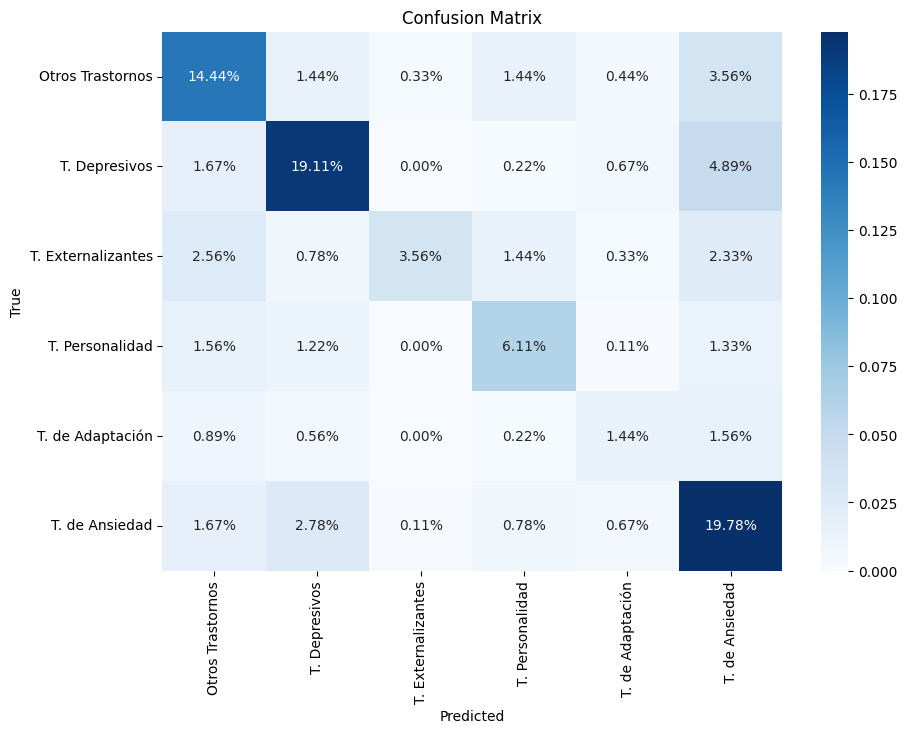

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Diccionario de mapeo
label_map = {0: 'Otros Trastornos', 
             1: 'T. Depresivos', 
             2: 'T. Externalizantes', 
             3: 'T. Personalidad', 
             4: 'T. de Adaptación', 
             5: 'T. de Ansiedad'}

labels = list(label_map.keys())

cm = confusion_matrix(y_test, y_pred, labels=labels)

# Obtener los nombres para mostrar
nombres_labels = [label_map[i] for i in labels]

plt.figure(figsize=(10, 7))

ax = sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues', xticklabels=nombres_labels, yticklabels=nombres_labels)
plt.xlabel('Predicted') 
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [7]:
# Guardar el modelo y el vectorizador
import joblib
joblib.dump(LR, 'modelo_LR.pkl')
joblib.dump(vectorizer_LR, 'vectorizer_LR.pkl')

['vectorizer_LR.pkl']